# Homework 06 - Limitations of computation Daniel Teeuwsen

#### Excercise 1

Let $a=b=1$. Write a short program that keeps dividing $b$ in half until the computer decides that $a+b=a$. Print out the value of $b$, and the number of times $b$ was divided. Try again with $a=b=100,000$

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

a = 1.0
b = 1.0
count = 0

while a+b != a:
    b = b/2
    count = count+1
print(a+b)
print(b)
print(count)


1.0
1.1102230246251565e-16
53


In [2]:
a = 100000.0
b = 100000.0
count = 0

while a+b != a:
    b = b/2
    count = count+1
print(a+b)
print(b)
print(count)

100000.0
5.551115123125783e-12
54


#### Excercise 2

What is the percent error between the true and computed value of the function
$$\frac{(1+x)-1}{x}$$ 
when $x=1\times10^{-15}$?

What about when $x=1\times10^{-13}$


In [3]:
computedVal1 = ((1+10**(-15))-1)/(10**(-15))
errorVal1 = np.round((np.abs(1-computedVal1))*100, decimals=4)

print('Computed value when x=10^-15: '+ str(computedVal1))
print('Percent error value when x=10^-15: '+ str(errorVal1) + '%')

Computed value when x=10^-15: 1.1102230246251565
Percent error value when x=10^-15: 11.0223%


In [4]:
computedVal2 = ((1+10**(-13))-1)/(10**(-13))
errorVal2 = np.round((np.abs(1-computedVal2))*100, decimals=4)

print('Computed value when x=10^-13: '+ str(computedVal2))
print('Percent error value when x=10^-13: '+ str(errorVal2) + '%')

Computed value when x=10^-13: 0.9992007221626409
Percent error value when x=10^-13: 0.0799%


#### Excercise 3
Consider the following two equations.
$$ x=1\quad y=1+10^{-14}\sqrt{2}$$

Write a small program the prints all the digits of $10^{+14}(y-x)$, and compare with the actual, correct result.

In [5]:
# lol sqrt(2) has an infinite decimal expansion so printing all the digits is impossible

x = 1.0
y = 1+10**(-14)*np.sqrt(2)

print('Computed value of equation = ' + str(10**14*(y-x)))
print('"true" value of equation ie (sqrt(2)) = ' + str(np.sqrt(2)))

Computed value of equation = 1.4210854715202004
"true" value of equation ie (sqrt(2)) = 1.4142135623730951


#### Excercise 4

Consider a simple quadratic equation $ax^2+bx+c=0$,  that has real solutions.

Write a program with a function that takes as input the three coefficients $a,b,c$ and prints out the two solutions using the standard formula
$$x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}.$$ 
**A.** Use the program to compute and print the solutions of $x^2-25.0=0$ using scientific notation.

**B.** Use the program to compute and print the solutions of $0.0001x^2+1000x+0.0001=0$  using scientific notation.


There's another way to write the quadratic equation. Write a second program that takes as input the three coefficients $a,b,c$ and prints out the two solutions using the other formula
$$x=\frac{2c}{-b\mp\sqrt{b^2-4ac}}.$$ 
**C.** Solve the same equations as before with this method.

**D.** What do you notice about the accuracy of both methods? Why is that?

<div class="alert alert-block alert-info">
<b>Tip:</b> To format output in scientific notation the value in a variable <tt>x</tt>:
<code> print(f"Value: {x:E}")</code>
</div>

In [6]:
def QuadEq1(a,b,c):
    root1 = (-b+np.sqrt(b*b-4*a*c))/(2*a)
    root2 = (-b-np.sqrt(b*b-4*a*c))/(2*a)
    #print(root1)
    #print(root2)
    print(f"root1: {root1:E}")
    print(f"root2: {root2:E}")

print('Equation 1')
QuadEq1(1.0, 0, -25.0)
print('\n')
QuadEq1(0.0001, 1000, 0.0001)
print('\n')


def QuadEq2(a,b,c):
    root1 = (2*c)/(-b-np.sqrt(b*b-4*a*c))
    root2 = (2*c)/(-b+np.sqrt(b*b-4*a*c))
    #print(root1)
    #print(root2)
    print(f"root1: {root1:E}")
    print(f"root2: {root2:E}")

print('Equation 2')
QuadEq2(1.0, 0, -25.0)
print('\n')
QuadEq2(0.0001, 1000, 0.0001)
print('\n')

Equation 1
root1: 5.000000E+00
root2: -5.000000E+00


root1: -1.000444E-07
root2: -1.000000E+07


Equation 2
root1: 5.000000E+00
root2: -5.000000E+00


root1: -1.000000E-07
root2: -9.995560E+06




**Answer**
The two functions produce different results due to loss of significance. Since b>0 => -b<0 and sqrt(b^2-4ac) approx== b finding root1 with the first equation requires the operation -b+approx(b) which will result in a "catastrophic cancellation." Similarly finding root2 with the second equation will also result in a catastrophic cancellation. Thus, root1 is more precise using the second equation and root2 is more precise using the first equation. In practice, only one equation is necessary since we can use Viete's formula root1 * root2 = c/a to find the other root.

#### Excercise 5

Plot 401 equally spaced points around the $x$ values of $(1-2\times10^{-8})$ to $(1+2\times10^{-8})$ of the function
$$f(x)=x^7-7x^6+21x^5-35x^4+35x^3-21x^2+7x-1.$$
This function is of course, $(x-1)^7$, which since $x$ is so close to 1, should be a nearly constant smooth curve close to zero. What did you get? 

0.99999998
1.00000002
1.0000000022492017e-10


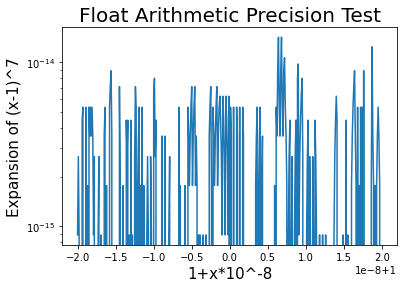

In [7]:
low = 1-(2*10**(-8))
high = 1+(2*10**(-8))

def f(x):
    return x**7-7*x**6+21*x**5-35*x**4+35*x**3-21*x**2+7*x-1

points,stepSize = np.linspace(low,high,401, retstep=True)

print(low)
print(high)
print(stepSize)
plt.xlabel(r'1+x*10^-8', fontsize=15, color='black')
plt.ylabel(r'Expansion of (x-1)^7', fontsize=15, color='black')
plt.title('Float Arithmetic Precision Test', fontsize=20, color='black')
plt.yscale('log')
plt.plot(points,f(points))

**Answer:**
The result is clearly not smooth. Seems to oscillate between 10^-14 and 10^-15.

#### Excercise 6

Let's explore how careful algorithmic complexity can increase the speed of a problem.

**A.** Write a program using the standard three-loop algorithm that multiplies two $N\times N$ matricies, where $N\geq10$. Time how long it takes in seconds. Use the following code to generate random number matricies, and time the multiplication. Print out the first 5 elements of the first row of your matrix.

By declaring the matrix `C` early, we can ensure that all the memory needed to hold the arrays is set at the beginning, and that no time is spent creating space or growing arrays to hold the values.
```python
import time
import numpy
N=25
A=numpy.random.rand(N,N)
B=numpy.random.rand(N,N)
C=numpy.zeros([N,N],float)

start_time = time.time()
# DO THE MULTIPLICATION LOOPS HERE
end_time = time.time()
print(f"Time elapsed: {end_time-start_time} seconds")
```

**B.** Now use the `numpy.dot` function to multiply the same matricies $A$ and $B$. Make sure you get the same result as above, by comparing at least the first 5 elements of the first row of the result. 

**C.** Try larger and larger values of $N$ (up to about 250) and time how long it takes for the three-loops long way, and for the `numpy.dot` method.

* Which method is faster when $N$ is small, for example, $N=10$?
* What value of $N$ did your method start to take more than 1 second?
* How much faster is the `numpy.dot` method to yours for $N=250$?

In [13]:
N = 25
A = np.random.rand(N,N)
B = np.random.rand(N,N)
C = np.zeros([N,N],float)
D = np.zeros([N,N],float)
element = 0

start_time = time.time()

for i in range(N):
    for j in range(N):
        for k in range(N):
            element = element + A[i][k]*B[k][j]

        C[i][j] = element
        element = 0
    
end_time = time.time()
print(f"Method 1 Time elapsed: {end_time-start_time} seconds")
print('\n')

for i in range(5):
    print(C[0][i])

print('\n')
start_time2 = time.time()

np.dot(A,B,out=D)

end_time2 = time.time()
print(f"Method 2 Time elapsed: {end_time2-start_time2} seconds")
print('\n')

for i in range(5):
    print(D[0][i])

Method 1 Time elapsed: 0.08095192909240723 seconds


5.562800846773616
7.016886906988166
5.393874418213552
5.747942288234664
6.412868589651748


Method 2 Time elapsed: 0.0009968280792236328 seconds


5.562800846773616
7.016886906988165
5.393874418213552
5.747942288234664
6.412868589651747


**Answer:**



-For very small N the first method is faster. For example, it is faster when N<=5, when N=6 sometimes method 1 is faster and sometimes it is slower. For N>=7 the second method is faster.

-For N>=80 the first method began to consistently take longer than one second.

-When N=250 the second method is approximately 35 seconds faster.